In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

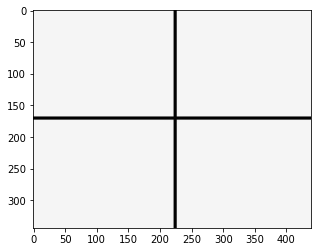

In [2]:
image_c = mpimg.imread("/content/horizontal_vertical.jpg")
plt.imshow(image_c)

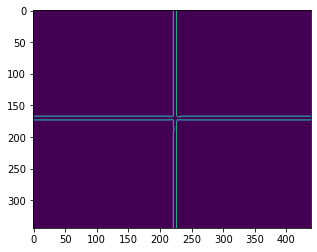

In [3]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_g, 50, 200, apertureSize = 3)
plt.imshow(image_canny)

In [4]:
# rho accuracy of 1 pixel and theta accuracy of np.pi / 180 (1 degree)
# threshold is number of points on line
# Try 300, 400 and 500
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)

In [5]:
len(lines)

4

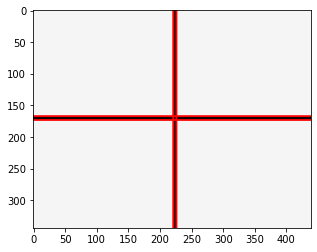

In [6]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)
            
            a = np.cos(theta)
            b = np.sin(theta)
           
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(image_c)